# Comparing used and wanted platforms in US [2017-2021]?

Preparing the datasets before heading to answring our 3 questions.

Install the needed libraries (pandas, numpy, matplotlib, and seaborn)

In [ ]:
pip install -r libraries.txt

Importing libraries and initialize variables

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

#intializing
pd.pandas.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="whitegrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Stackoverflow survey data
df_2017 = pd.read_csv('survey_results_public17.csv')
df_2021 = pd.read_csv('survey_results_public21.csv')

In [3]:
# Showing first 5 entries from 2017 survey
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [4]:
# Showing first 5 entries from 2021 survey
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

# What is the most used/wanted platform in US [2017-2021]? 

In [5]:
def filter_column(df, column_filter, column_value, columns):
    ''' Filter a dataframe by column.,
        returns filtred dataframe.
    '''
    
    filtered_df = df
    
    for column in columns: 
        filtered_df = filtered_df[filtered_df[column_filter] == column_value].dropna(subset=[column]) #dropping null values
        
    return filtered_df

# Filter the dataframe by Brazil and selecting some columns.
US_2017 = filter_column(df_2017, 'Country', 'United States', ['HaveWorkedPlatform', 'WantWorkPlatform'])
US_2021 = filter_column(df_2021, 'Country', 'United States of America', ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith'])
US_student_2017 = filter_column(US_2017, 'Professional', 'Student', [ 'WantWorkPlatform'])
US_student_2021 = filter_column(US_2021, 'Employment', 'Student, full-time', [ 'PlatformWantToWorkWith'])

In [6]:
#Showing results
US_student_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
127,128,"I am not primarily a developer, but I write co...","Student, full-time",United States of America,New York,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,"Other online resources (ex: videos, blogs, etc...",5,NaN,NaN,NaN,NaN,NaN,NaN,C;Dart;JavaScript,C;Dart,Firebase,Firebase,Google Cloud Platform,Google Cloud Platform,NaN,NaN,Flutter,Flutter,NaN,NaN,Visual Studio;Visual Studio Code,Visual Studio;Visual Studio Code,Windows,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent;East Asian;Biracial,None of the above,None of the above,Appropriate in length,Easy,NaN
314,315,I code primarily as a hobby,"Student, full-time",United States of America,Texas,NaN,Primary/elementary school,5 - 10 years,Other (please specify):,5,NaN,NaN,NaN,NaN,NaN,NaN,Haskell;Java;JavaScript;Python;Rust;Scala,Haskell;Java;Kotlin;Node.js;Rust;Scala;TypeScript,NaN,NaN,Heroku,AWS;DigitalOcean;Heroku,jQuery,React.js;Svelte;Vue.js,Apache Spark;NumPy;TensorFlow;Torch/PyTorch,Apache Spark;NumPy;TensorFlow;Torch/PyTorch,Git,Deno;Docker;Git,Atom;Eclipse;IntelliJ;Neovim;Vim,Neovim;Vim,Linux-based,Visit Stack Overflow;Google it;Do other work a...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",Yes,Under 18 years old,Man,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Easy,NaN
321,322,I code primarily as a hobby,"Student, full-time",United States of America,Florida,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,Coding Bootcamp;Other (please specify):,2,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell;Go;HTML/CSS;Java;JavaScript;PHP;Pyt...,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;Python...,MySQL,MySQL,Google Cloud Platform;Heroku,Google Cloud Platform;Heroku,jQuery,NaN,TensorFlow,NaN,Unity 3D,NaN,Atom;Eclipse;IntelliJ;NetBeans;Notepad++;Visua...,Atom;Eclipse;IntelliJ;NetBeans;Notepad++;Visua...,Other (please specify):,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,A few times per week,Yes,A few times per week,"Yes, somewhat",No,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have an anxiety disorder,Appropriate in length,Easy,NaN
391,392,I am a student who is learning to code,"Student, full-time",United States of America,Georgia,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,NaN,NaN,NaN,NaN,NaN,NaN,C++;JavaScript;Node.js;Python;Swift;TypeScript,C;C++;HTML/CSS;JavaScript;Node.js;Python;Swift,Firebase,Firebase,Google Cloud Platform,Google Cloud Platform,Flask;jQuery,Flask;jQuery;React.js,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NumPy;Pandas;Torch/PyTorch,Docker;Git;Kubernetes;Unity 3D,Docker;Git;Kubernetes,Atom;IPython/Jupyter;PyCharm;Sublime Text;Vim;...,IPython/Jupyter;Sublime Text;Vim;Visual Studio...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,A few times per week,Yes,A few times per month or weekly,"Yes, definitely",No,Under 18 years old,Man,No,Gay or Lesbian,East Asian,None of the above,None of the 

In [8]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    splitted_df = df
    column_series = splitted_df[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_platform_2017 = split_column(US_2017, 'HaveWorkedPlatform')
wanted_platform_2017 = split_column(US_2017, 'WantWorkPlatform')

worked_platform_2021 = split_column(US_2021, 'PlatformHaveWorkedWith')
wanted_platform_2021 = split_column(US_2021, 'PlatformWantToWorkWith')

wanted_platform_student_2017 = split_column(US_student_2017, 'WantWorkPlatform')
wanted_platform_student_2021 = split_column(US_student_2021, 'PlatformWantToWorkWith')



In [9]:
wanted_platform_student_2017.head()

0                                                  [iOS]
56                     [Windows Phone,  Windows Desktop]
210    [Android,  iOS,  Windows Desktop,  Linux Deskt...
292                                            [Android]
341    [Windows Desktop,  Linux Desktop,  Raspberry P...
Name: WantWorkPlatform, dtype: object

In [10]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_platform_2017 = disarray(worked_platform_2017)
list_wanted_platform_2017 = disarray(wanted_platform_2017)

list_worked_platform_2021 = disarray(worked_platform_2021)
list_wanted_platform_2021 = disarray(wanted_platform_2021)

list_wanted_platform_student_2017 = disarray(wanted_platform_student_2017)
list_wanted_platform_student_2021 = disarray(wanted_platform_student_2021)

def removing_duplicate_AWS(array_list):
    
    for x in range(len(array_list)):
      if(array_list[x] == 'Amazon Web Services (AWS)'):
        array_list[x] = 'AWS'
            
    return array_list

list_worked_platform_2017 = removing_duplicate_AWS(list_worked_platform_2017)
list_worked_platform_2021 = removing_duplicate_AWS(list_worked_platform_2021)
list_wanted_platform_2017 = removing_duplicate_AWS(list_wanted_platform_2017)
list_wanted_platform_2021 = removing_duplicate_AWS(list_wanted_platform_2021)
list_wanted_platform_student_2017 = removing_duplicate_AWS(list_wanted_platform_student_2017)
list_wanted_platform_student_2021 = removing_duplicate_AWS(list_wanted_platform_student_2021)



In [11]:
#showing results
for x in range(20):
  print(list_wanted_platform_student_2021[x])

Google Cloud Platform
AWS
DigitalOcean
Heroku
Google Cloud Platform
Heroku
Google Cloud Platform
AWS
DigitalOcean
Google Cloud Platform
Google Cloud Platform
Microsoft Azure
Google Cloud Platform
Microsoft Azure
AWS
AWS
Google Cloud Platform
Heroku
Microsoft Azure
AWS


In [12]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Platform':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_platform_2017 = group_list(list_worked_platform_2017, '2017')
dict_wanted_platform_2017 = group_list(list_wanted_platform_2017, '2017')

dict_worked_platform_2021 = group_list(list_worked_platform_2021, '2021')
dict_wanted_platform_2021 = group_list(list_wanted_platform_2021, '2021')

dict_wanted_platform_student_2017 = group_list(list_wanted_platform_student_2017, '2017')
dict_wanted_platform_student_2021 = group_list(list_wanted_platform_student_2021, '2021')

In [13]:
for x in range(len(dict_wanted_platform_student_2021)):
  print(dict_wanted_platform_student_2021[x])

{'Platform': 'Google Cloud Platform', 'Count': 233, 'Year': '2021'}
{'Platform': 'AWS', 'Count': 313, 'Year': '2021'}
{'Platform': 'DigitalOcean', 'Count': 164, 'Year': '2021'}
{'Platform': 'Heroku', 'Count': 174, 'Year': '2021'}
{'Platform': 'Microsoft Azure', 'Count': 150, 'Year': '2021'}
{'Platform': 'IBM Cloud or Watson', 'Count': 27, 'Year': '2021'}
{'Platform': 'Oracle Cloud Infrastructure', 'Count': 23, 'Year': '2021'}


In [14]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_platforms = create_dataframe([dict_worked_platform_2017, dict_worked_platform_2021])
wanted_platforms = create_dataframe([dict_wanted_platform_2017, dict_wanted_platform_2021])
wanted_platforms_for_student = create_dataframe([dict_wanted_platform_student_2017, dict_wanted_platform_student_2021])

In [15]:
wanted_platforms_for_student.tail(10)

,Platform,Count,Year
12,Salesforce,15,2017
13,WordPress,42,2017
14,Mainframe,10,2017
0,Google Cloud Platform,233,2021
1,AWS,313,2021
2,DigitalOcean,164,2021
3,Heroku,174,2021
4,Microsoft Azure,150,2021
5,IBM Cloud or Watson,27,2021
6,Oracle Cloud Infrastructure,23,2021


In [27]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_platforms['Percentage'] = percentage(worked_platforms, 'Year')
wanted_platforms['Percentage'] = percentage(wanted_platforms, 'Year')
wanted_platforms_for_student['Percentage'] = percentage(wanted_platforms_for_student, 'Year')

In [17]:
wanted_platforms_for_student.head()

,Platform,Count,Year
0,iOS,199,2017
1,Windows Phone,21,2017
2,Windows Desktop,193,2017
3,Android,255,2017
4,Linux Desktop,262,2017


In [44]:
# Get the top 10 platforms
    
top_10_worked_platforms = worked_platforms.sort_values(by=['Percentage'], ascending=False).head(11)['Platform'].unique()
top_10_wanted_platforms = wanted_platforms.sort_values(by=['Percentage'], ascending=False).head(11)['Platform'].unique()
top_10_wanted_platforms_for_student = wanted_platforms_for_student.sort_values(by=['Percentage'], ascending=False).head(11)['Platform'].unique()


worked_platforms_chart = worked_platforms[worked_platforms['Platform'].isin(top_10_worked_platforms)]
wanted_platforms_chart = wanted_platforms[wanted_platforms['Platform'].isin(top_10_worked_platforms)]
wanted_platforms_chart_for_student = wanted_platforms_for_student[wanted_platforms_for_student['Platform'].isin(top_10_wanted_platforms_for_student)]

In [55]:
for x in range(len(top_10_wanted_platforms_for_student)):
  print(x+1, '-', top_10_wanted_platforms_for_student[x])

1 - AWS
2 - Google Cloud Platform
3 - Heroku
4 - DigitalOcean
5 - Linux Desktop
6 - Android
7 - Microsoft Azure
8 - Raspberry Pi
9 - iOS
10 - Windows Desktop


# Q1) What is the most used platform in US [2017-2021]? 

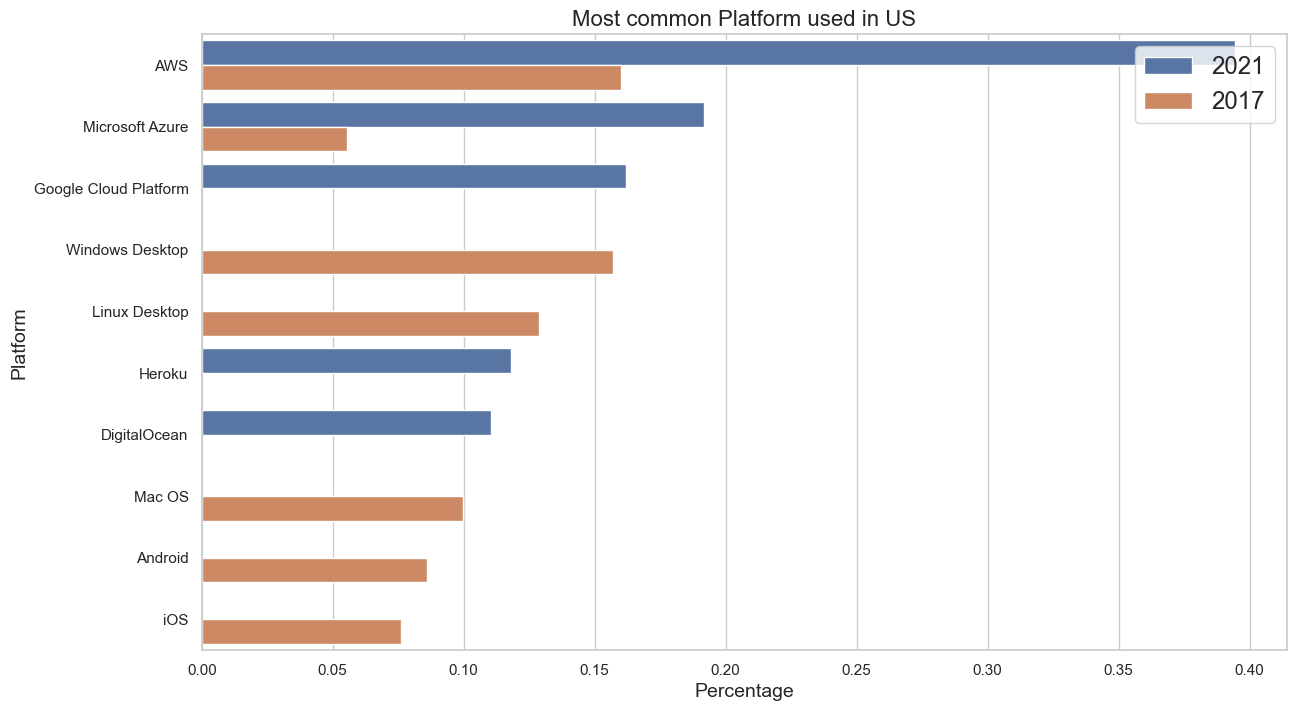

In [52]:
# Figure 1 — Percentage of used platforms in US 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Platform',
            hue = 'Year',
            data = worked_platforms_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Platform used in US', size = 16)
plt.show()

# Q2) What is the most wanted platform in US [2017-2021]? 

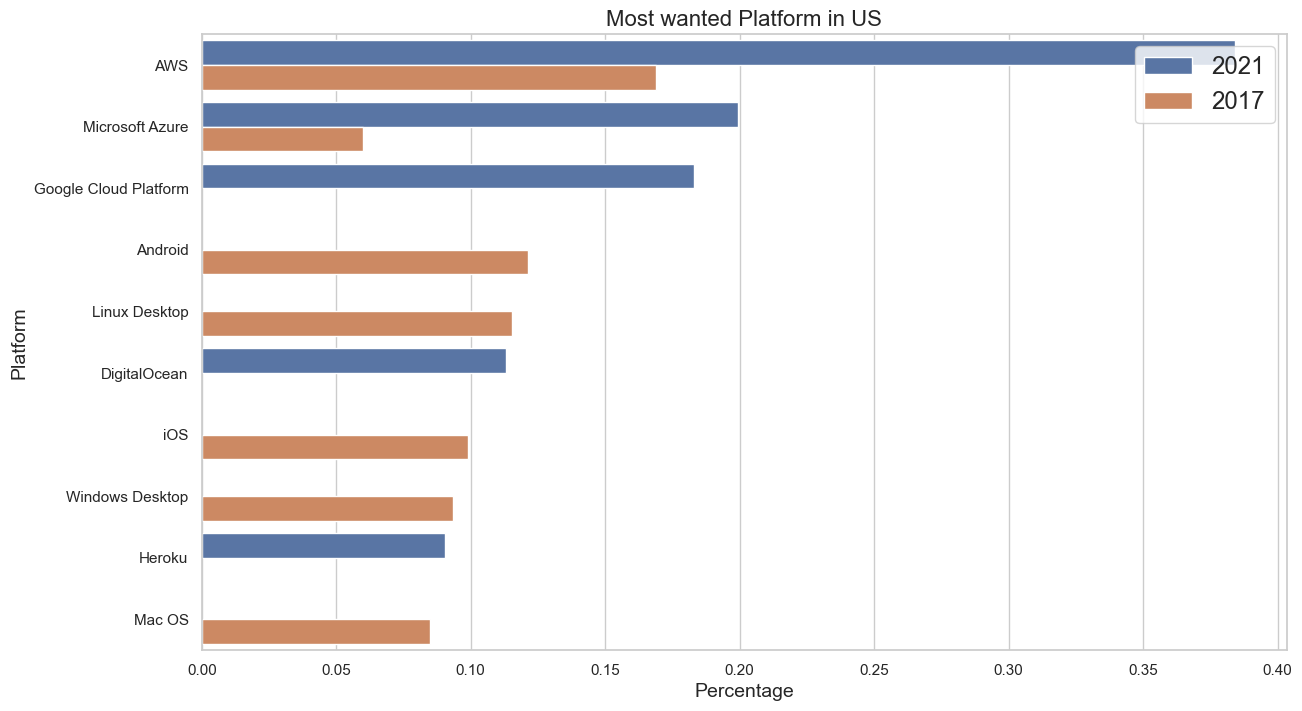

In [53]:
# Figure 2 — Percentage of wanted platforms in US

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Platform',
            hue = 'Year',
            data = wanted_platforms_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Platform in US', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

# Q3) What is the most wanted platform for students in US [2017-2021]? 

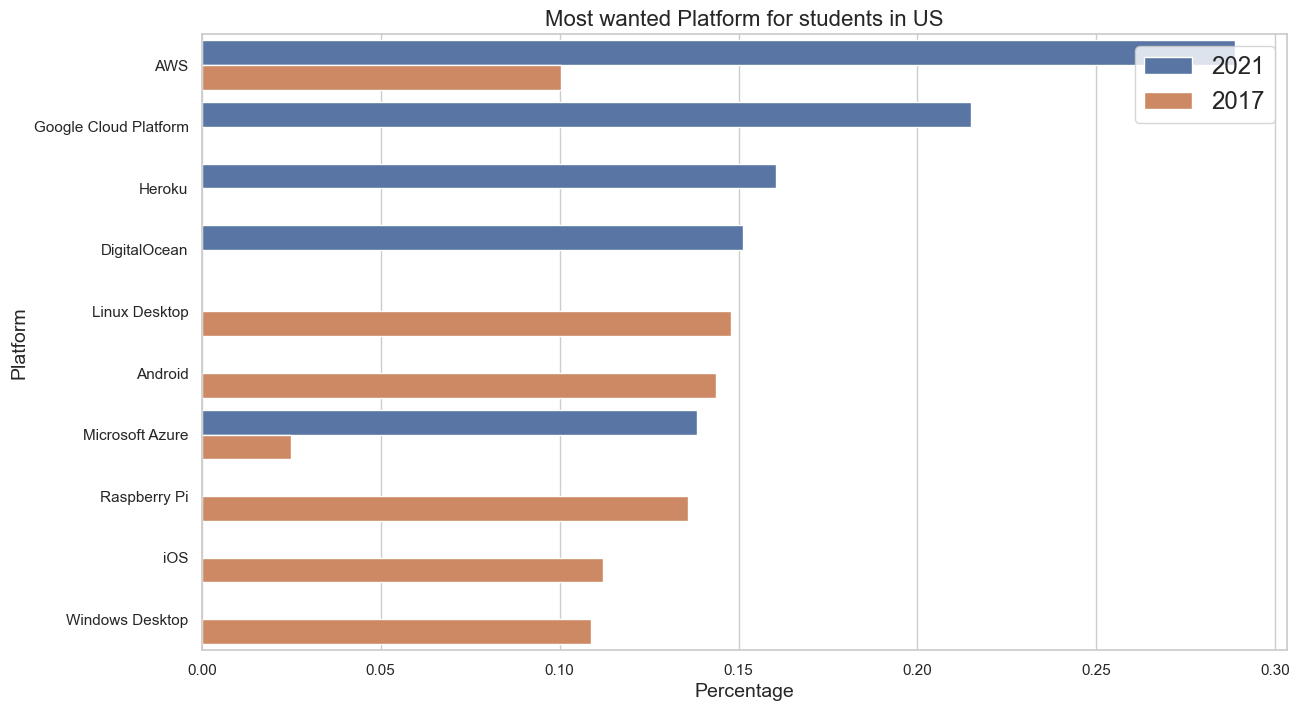

In [56]:
# Figure 3 — Percentage of wanted platforms for students in US

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Platform',
            hue = 'Year',
            data = wanted_platforms_chart_for_student.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Platform for students in US', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()